In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [6]:
import requests
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0c841f596853ad356bfef3fbdef08cd8


In [8]:
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shaoyang
Processing Record 2 of Set 1 | imbituba
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | westpunt
City not found. Skipping...
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ferrol
Processing Record 8 of Set 1 | tocopilla
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | jackson
Processing Record 12 of Set 1 | amahai
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | schwabisch hall
Processing Record 15 of Set 1 | zhigansk
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | abu samrah
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | sudzha
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set

Processing Record 36 of Set 4 | russell
Processing Record 37 of Set 4 | tautira
Processing Record 38 of Set 4 | saldanha
Processing Record 39 of Set 4 | chernyshevsk
Processing Record 40 of Set 4 | timmins
Processing Record 41 of Set 4 | galle
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | lembeni
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | khasan
Processing Record 46 of Set 4 | tuktoyaktuk
Processing Record 47 of Set 4 | panguna
Processing Record 48 of Set 4 | manzanillo
Processing Record 49 of Set 4 | hihifo
City not found. Skipping...
Processing Record 50 of Set 4 | sullana
Processing Record 1 of Set 5 | bulz
Processing Record 2 of Set 5 | sawtell
Processing Record 3 of Set 5 | chiang rai
Processing Record 4 of Set 5 | leh
Processing Record 5 of Set 5 | marcona
City not found. Skipping...
Processing Record 6 of Set 5 | bedele
Processing Record 7 of Set 5 | linxia
Processing Record 8 of Set 5 | abaza
Processing Record 9 of Se

City not found. Skipping...
Processing Record 24 of Set 8 | kahului
Processing Record 25 of Set 8 | juegang
Processing Record 26 of Set 8 | tessalit
Processing Record 27 of Set 8 | mobaye
Processing Record 28 of Set 8 | ruiz
Processing Record 29 of Set 8 | campbeltown
Processing Record 30 of Set 8 | istok
Processing Record 31 of Set 8 | lobva
Processing Record 32 of Set 8 | bouca
Processing Record 33 of Set 8 | asosa
Processing Record 34 of Set 8 | bani walid
Processing Record 35 of Set 8 | clyde river
Processing Record 36 of Set 8 | derzhavinsk
Processing Record 37 of Set 8 | liwale
Processing Record 38 of Set 8 | ust-ishim
Processing Record 39 of Set 8 | huangmei
Processing Record 40 of Set 8 | olinda
Processing Record 41 of Set 8 | bandarban
Processing Record 42 of Set 8 | olafsvik
Processing Record 43 of Set 8 | kholodnyy
Processing Record 44 of Set 8 | kangaatsiaq
Processing Record 45 of Set 8 | fortuna
Processing Record 46 of Set 8 | saint-leu
Processing Record 47 of Set 8 | puer

Processing Record 12 of Set 12 | dukat
Processing Record 13 of Set 12 | luena
Processing Record 14 of Set 12 | alice springs
Processing Record 15 of Set 12 | alyangula
Processing Record 16 of Set 12 | vanavara
Processing Record 17 of Set 12 | mount isa
Processing Record 18 of Set 12 | sol-iletsk
Processing Record 19 of Set 12 | general pico
Processing Record 20 of Set 12 | ouargaye
Processing Record 21 of Set 12 | awjilah
Processing Record 22 of Set 12 | havoysund
Processing Record 23 of Set 12 | rundu
Processing Record 24 of Set 12 | porto torres
Processing Record 25 of Set 12 | novoderevyankovskaya
Processing Record 26 of Set 12 | russkiy aktash
Processing Record 27 of Set 12 | jerez
Processing Record 28 of Set 12 | acapulco
Processing Record 29 of Set 12 | port-gentil
Processing Record 30 of Set 12 | camacha
Processing Record 31 of Set 12 | dovers
Processing Record 32 of Set 12 | conceicao da barra
Processing Record 33 of Set 12 | road town
Processing Record 34 of Set 12 | umm durma

In [12]:
len(city_data)

575

In [13]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shaoyang,27.2315,111.4525,70.25,82,30,2.10,CN,2021-03-28 16:08:13
1,Imbituba,-28.2400,-48.6703,84.20,65,75,11.50,BR,2021-03-28 16:08:13
2,College,64.8569,-147.8028,3.20,72,75,2.04,US,2021-03-28 16:08:13
3,Ancud,-41.8697,-73.8203,64.40,68,20,14.97,CL,2021-03-28 16:08:13
4,Rikitea,-23.1203,-134.9692,78.17,76,13,16.73,PF,2021-03-28 16:08:14
5,Ferrol,43.4832,-8.2369,73.00,40,0,6.91,ES,2021-03-28 16:08:14
6,Tocopilla,-22.0920,-70.1979,72.09,67,4,7.87,CL,2021-03-28 16:08:14
7,Albany,42.6001,-73.9662,50.00,84,100,13.73,US,2021-03-28 16:05:36
8,Punta Arenas,-53.1500,-70.9167,51.80,43,0,23.02,CL,2021-03-28 16:03:30
9,Jackson,42.4165,-122.8345,52.00,65,1,3.44,US,2021-03-28 16:08:14


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shaoyang,CN,2021-03-28 16:08:13,27.2315,111.4525,70.25,82,30,2.10
1,Imbituba,BR,2021-03-28 16:08:13,-28.2400,-48.6703,84.20,65,75,11.50
2,College,US,2021-03-28 16:08:13,64.8569,-147.8028,3.20,72,75,2.04
3,Ancud,CL,2021-03-28 16:08:13,-41.8697,-73.8203,64.40,68,20,14.97
4,Rikitea,PF,2021-03-28 16:08:14,-23.1203,-134.9692,78.17,76,13,16.73
5,Ferrol,ES,2021-03-28 16:08:14,43.4832,-8.2369,73.00,40,0,6.91
6,Tocopilla,CL,2021-03-28 16:08:14,-22.0920,-70.1979,72.09,67,4,7.87
7,Albany,US,2021-03-28 16:05:36,42.6001,-73.9662,50.00,84,100,13.73
8,Punta Arenas,CL,2021-03-28 16:03:30,-53.1500,-70.9167,51.80,43,0,23.02
9,Jackson,US,2021-03-28 16:08:14,42.4165,-122.8345,52.00,65,1,3.44


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

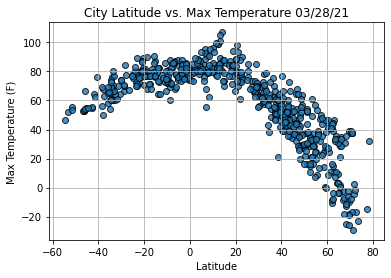

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

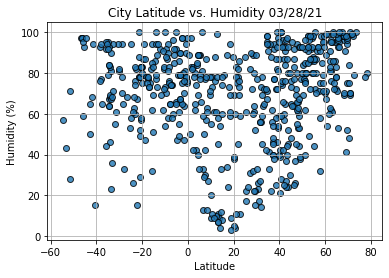

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

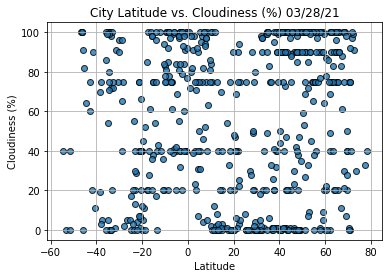

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

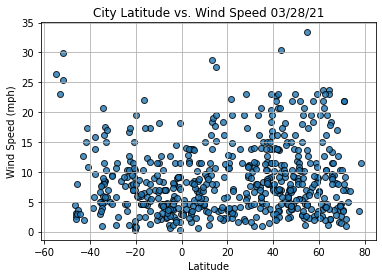

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
# Import linregress
from scipy.stats import linregressplt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                     Zhigansk
Country                        RU
Date          2021-03-28 16:08:15
Lat                       66.7697
Lng                       123.371
Max Temp                    -2.61
Humidity                       99
Cloudiness                     83
Wind Speed                   3.67
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
570    False
571     True
572    False
573    False
574    False
Name: Lat, Length: 575, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shaoyang,CN,2021-03-28 16:08:13,27.2315,111.4525,70.25,82,30,2.10
2,College,US,2021-03-28 16:08:13,64.8569,-147.8028,3.20,72,75,2.04
5,Ferrol,ES,2021-03-28 16:08:14,43.4832,-8.2369,73.00,40,0,6.91
7,Albany,US,2021-03-28 16:05:36,42.6001,-73.9662,50.00,84,100,13.73
9,Jackson,US,2021-03-28 16:08:14,42.4165,-122.8345,52.00,65,1,3.44
...,...,...,...,...,...,...,...,...,...
564,Hamilton,US,2021-03-28 16:06:23,39.1834,-84.5333,51.80,54,75,23.02
565,Viransehir,TR,2021-03-28 16:10:27,37.2353,39.7631,46.92,54,1,8.55
566,Yatou,CN,2021-03-28 16:10:27,37.1500,122.3833,46.58,45,26,8.14
568,Tobol,KZ,2021-03-28 16:10:28,52.6844,62.5794,16.56,93,7,8.01


In [28]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

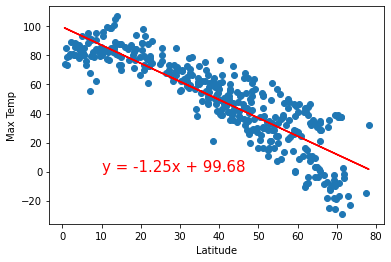

In [30]:
# Linear regression on the Northern Hemisphere for max temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

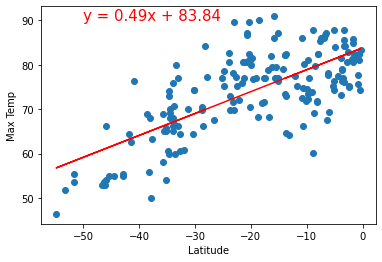

In [31]:
# Linear regression on the Southern Hemisphere for max temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

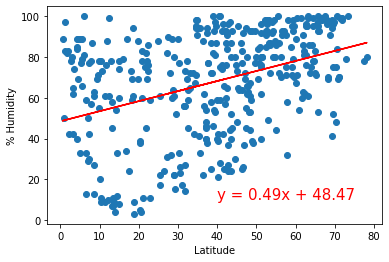

In [32]:
# Linear regression on the Northern Hemisphere for % humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

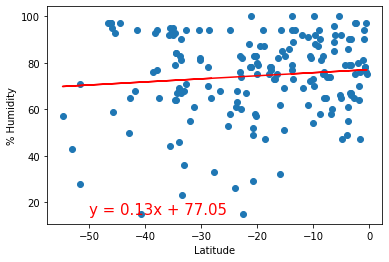

In [34]:
# Linear regression on the Southern Hemisphere for % humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

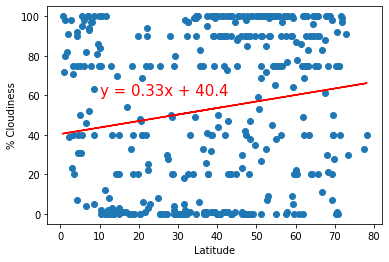

In [36]:
# Linear regression on the Northern Hemisphere for % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

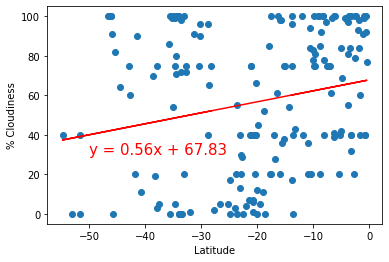

In [39]:
# Linear regression on the Southern Hemisphere % cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,30))

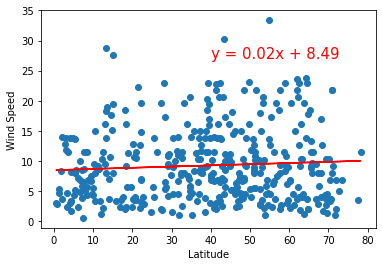

In [43]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,27))


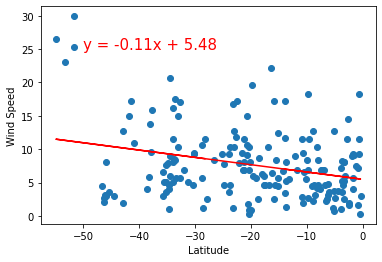

In [45]:
# Linear regression on the Southern Hemisphere for wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))